In [71]:
# Center of Mass Position and Velocity                                                                                 

# import modules                                                                                                       
import numpy as np
import astropy.units as u
import pygadgetreader as pyg
import matplotlib.pyplot as plt


In [74]:
class CenterOfMass:
    #"../sims/MW_1M_db_010"

    def __init__(self,ptype):
        # Input:  Ptype is an integer 1,2 or 3 where 1, 2, 3 specify if you want disk, bulge or halo
         
        if ptype == 1:
            a = "disk"
        elif ptype == 2:
            a = "bulge"
        elif ptype == 3:
            a = "dm"
        else:
            print ("invalid input")
        
         #1) 
        # read in the snapshot using pygadget reader 
        # and store positions and velocities and masses of the given particle type as arrays
        # you will need an if statement here to specify what gets loaded using pygadget reader
        self.pos = pyg.readsnap("../sims/MW_1M_db_010", "pos", a)
        self.vel = pyg.readsnap("../sims/MW_1M_db_010",'vel', a)
        self.mass = pyg.readsnap("../sims/MW_1M_db_010", "mass", a)
        
        

   
                        
                     

    # EXAMPLE FUNCTION 
    def total_mass(self):
        # function that returns the total mass of the disk 
        # output: Mass is units of Msun
        # slef allows you to call functions anytime without defining it again
        
        
        #Note: you can add other keyword arguments into the function, but 'self' must be first                         
        #return np.sum(self.mass)*u.Msun*1e10
        
        return np.sum(self.mass)*1e10
    
    
      
    
        # 2 ) Create a new function that returns the mass of the disk within a given radius 
        # Return the disk mass within a 3D radius of 5 kpc of (0,0,0) 
        # the function  np.where  is useful here.  
    
    def total_mass_inr(self, k):
        # we are using k to be able to ask for any radius that we want
        
        xpos= self.pos[:,0]
    
        ypos= self.pos[:,1]
    
        zpos= self.pos[:,2]

        r_disk = np.sqrt(xpos**2 + ypos**2 + zpos**2)
        #print (xpos[0], ypos[0], zpos[0], r_disk[0]) 
        

        rindex = np.where(r_disk<k)[0]   # [0] forces the array into one columm
        #print (r_disk[rindex[0]]) # prints the value of r_disk for the first particle that has r< 20  
        #print (rindex[0]) # prints the index in the r_disk array of the first particle that has r < 20  
        #print (np.max(r_disk[rindex])) #prints the max value of the r_disk array that should have all particles with r < 20
        # check that max should be less than 20 
        mass_rcut = self.mass[rindex] 
        
        #return np.sum(mass_rcut)*u.Msun*1e10
        
        return np.sum(mass_rcut)*1e10
    
    def mass_profile(self, maxradius, interval=2):
    
        
        r = np.arange(0, maxradius, interval)
        
        mass = [self.total_mass_inr(i) for i in r]
        
        return mass,r
    
        
        
        

# make a plot of the mass profile, plot the mass of the disk (whithin 20kpc) as a function of radius 
#later do bulge and halo


In [75]:
# EXAMPLE OF USING A CLASS                                                                                             
##########################                                                                                             

# Create a Center of mass object for the MW DISK PARTICLES                                                                           
MWCOM = CenterOfMass(1)
MWCOM_BULGE= CenterOfMass(2)
MWCOM_HALO = CenterOfMass(3) 
#calling initial function CenterOfMass with the disk input

Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Mass
Returning BULGE Positions
Returning BULGE Velocities
Returning BULGE Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass


In [70]:
np.sum(MWCOM.mass)

5.78837

In [62]:
MWCOM.total_mass_inr(15)

55774965286.25488

In [63]:
# EXAMPLE
# Return total disk mass 

MW_Diskmass = MWCOM.total_mass()
print("MW Disk Mass:", MW_Diskmass)

MW Disk Mass: 57883701324.46289


In [76]:
m, r = MWCOM.mass_profile(20)
mb, rb = MWCOM_BULGE.mass_profile(20)
mdm, rdm = MWCOM_HALO.mass_profile(20)


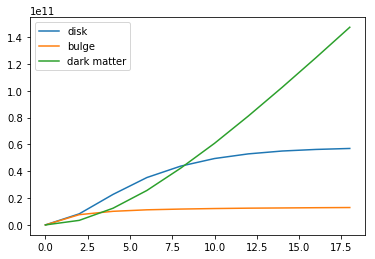

In [80]:
plt.plot(r,m, label="disk")
plt.plot(rb, mb, label="bulge")
plt.plot(rdm, mdm, label="dark matter")
plt.legend()

In [66]:
m

[0.0,
 8261438012.123108,
 22770214080.810547,
 35339024066.92505,
 43849663734.436035,
 49518165588.37891,
 52988033294.677734,
 55118846893.31055,
 56297025680.54199,
 57027273178.100586]